# Understanding Convolution and its effects

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def compute_convolution(x, h):
    """
    Implements discrete convolution:
        y[n] = sum_{l=0}^{M-1} x[l] * h[n-l]
    assuming h has length M, x has length N (with M <= N).
    Returns a vector of length N (valid range as per assignment).
    """
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1)

    for n in range(len(y)):
        acc = 0.0
        for l in range(M):
            if 0 <= n - l < N:
                acc += x[n - l] * h[l]
        y[n] = acc
    return y


In [7]:
def taskE_self_convolution(sr=100):

    t = np.linspace(0, 5, int(5*sr), endpoint=False)

    # rect function Π(t-2.5): width = 1, centered at 2.5
    x = np.where(np.abs(t - 2.5) <= 0.5, 1.0, 0.0)

    # First convolution: x * x
    y1 = compute_convolution(x, x)
    y1 /= np.max(np.abs(y1))  # normalize

    # Second convolution: (x*x) * x
    y2 = compute_convolution(y1, x)
    Z = y2
    y2 /= np.max(np.abs(y2))  # normalize

    # Third convolution: ((x*x)*x) * x
    y3 = compute_convolution(y2, x)
    y3 /= np.max(np.abs(y3))  # normalize

    # New time axes after each convolution (grow longer each time)
    t1 = np.linspace(0, len(y1)/sr, len(y1), endpoint=False)
    t2 = np.linspace(0, len(y2)/sr, len(y2), endpoint=False)
    t3 = np.linspace(0, len(y3)/sr, len(y3), endpoint=False)

    plt.figure(figsize=(10,6))
    plt.plot(t, x, label="x[n] (rect)", linewidth=1.2)
    plt.plot(t1, y1, label="1st convolution (x*x)")
    plt.plot(t2, y2, label="2nd convolution (Z = (x*x)*x)")
    plt.plot(t3, y3, label="3rd convolution (((x*x)*x)*x)")
    plt.title("Repeated convolution of rect() with itself")
    plt.xlabel("time (s)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return (t, x), (t1, y1), (t2, y2), (t3, y3)

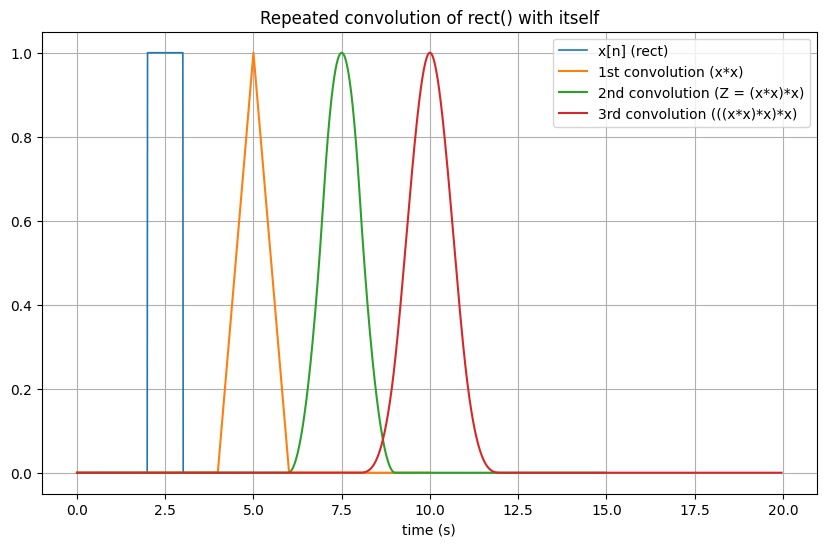

In [6]:
(tx, x), (t1, y1), (t2, y2), (t3, y3) = taskE_self_convolution(sr=100)

### Q)  State your observations on the smoothness of z after each convolution.

- After the first convolution:

    - The convolution of a rectangular pulse with itself produces a triangular shape.
    - The sharp edges of the original rectangle are smoothed.
    - The width of the support doubles, since the convolution of two signals adds their durations.

- After the second convolution:

    - The triangular waveform, when convolved again with a rectangle, becomes a parabolic curve.
    - The sharp corner at the top of the triangle is rounded, and the resulting signal is smoother and broader.

- After the third convolution:

    - The signal becomes even smoother.
    - The overall trend is that with each convolution, the result gets progressively smoother and more bell-shaped.

- Repeated convolution with a simple shape acts like a smoothing filter.
- The more times we convolve, the closer the waveform approaches a Gaussian shape (by Central Limit Theorem).
- This demonstrates how convolution progressively smoothens signals and spreads their energy over a larger duration.